<a href="https://colab.research.google.com/github/davidmorme/Universidad/blob/main/Diversi%C3%B3n/Juego_con_2_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
iteraciones=20000
Dado1=np.zeros(iteraciones)
Dado2=np.zeros(iteraciones)
Suma=np.zeros(iteraciones)
for i in range(0,iteraciones):
  Dado1[i]=random.randint(1,6)
  Dado2[i]=random.randint(1,6)
  Suma[i]=Dado1[i]+Dado2[i]

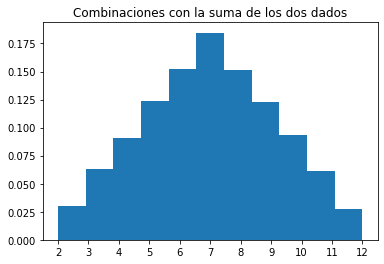

In [7]:
plt.hist(Suma,bins=11,density=True)
plt.title('Combinaciones con la suma de los dos dados')
plt.xticks(range(2,13))
plt.show()

In [4]:
Todos=np.concatenate((Dado1,Dado2,Suma),axis=0)

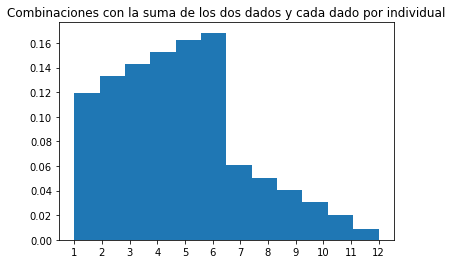

In [6]:
plt.hist(Todos,bins=12,density=True)
plt.title('Combinaciones con la suma de los dos dados y cada dado por individual')
plt.xticks(range(1,13))
plt.show()

In [16]:
Pares=np.zeros(iteraciones)
for i in range(0,iteraciones):
  if Dado1[i]==Dado2[i]:
    Pares[i]=Dado1[i]

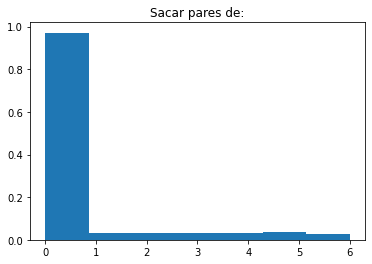

In [18]:
plt.hist(Pares,bins=7,density=True)
plt.title('Sacar pares de:')
plt.show()

In [19]:
PPar=sum(Pares>0)/len(Pares)*100
print('La probabilidad de obtener par en un lanzamiento es de:',PPar,'%')

La probabilidad de obtener par en un lanzamiento es de: 16.76 %


In [24]:
P=np.zeros(12)
for j in range(1,13):
  P[j-1]=round(sum(Todos==j)/len(Todos)*100,2)
print(P)

[10.95 12.2  13.12 13.97 14.92 15.43  5.59  4.58  3.72  2.82  1.85  0.84]


In [25]:
DF=pd.DataFrame({'Valor':range(1,13),'Probabilidad (%)':P})
DF.set_index('Valor',inplace=True)
DF.loc['Par']=PPar
DF

,Probabilidad (%)
Valor,
1,10.95
2,12.20
3,13.12
4,13.97
5,14.92
6,15.43
7,5.59
8,4.58
9,3.72


In [26]:
Numero=np.zeros(12)
Par=0
iteracion=0
for i in range(1,7):
  for j in range(1,7):
    Numero[i-1]=Numero[i-1]+1
    Numero[j-1]=Numero[j-1]+1
    Numero[i+j-1]=Numero[i+j-1]+1
    if i==j:
      Par=Par+1
    iteracion=iteracion+1

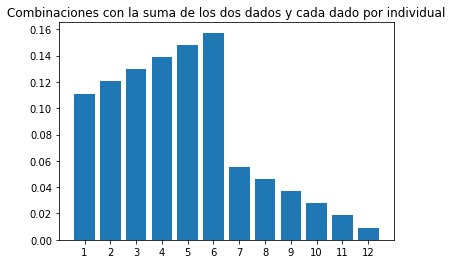

In [27]:
plt.bar(range(1,13),Numero/sum(Numero))
plt.xticks(range(1,13))
plt.title('Combinaciones con la suma de los dos dados y cada dado por individual')
plt.show()

In [29]:
DF1=pd.DataFrame({'Valor':range(1,13),'Probabilidad (%)':np.around(Numero/sum(Numero)*100,2)})
DF1.set_index('Valor',inplace=True)
DF1.loc['Par']=round(Par/iteracion*100,2)
DF1

,Probabilidad (%)
Valor,
1,11.11
2,12.04
3,12.96
4,13.89
5,14.81
6,15.74
7,5.56
8,4.63
9,3.70


In [30]:
DF1['Simulación']=DF['Probabilidad (%)']
DF1['% Error']=(DF1['Probabilidad (%)']-DF1['Simulación'])/DF1['Probabilidad (%)']*100

In [31]:
DF1

,Probabilidad (%),Simulación,% Error
Valor,,,
1,11.11,10.95,1.440144
2,12.04,12.20,-1.328904
3,12.96,13.12,-1.234568
4,13.89,13.97,-0.575954
5,14.81,14.92,-0.742741
6,15.74,15.43,1.969504
7,5.56,5.59,-0.539568
8,4.63,4.58,1.079914
9,3.70,3.72,-0.540541
